# Remark
## インプットファイルの要件
- 元データのCSVが時系列順で[ForwardBG, signal, BackwardBG]の順に並んでいる。
- ch1で奇数番目のファイバー、ch2で偶数番目のファイバーを読んでいる(ch2を使わない場合はch2を無視して良い。)
- ch1のファイバー番号の方がch2のファイバー番号より若い

## output
- それぞれのRunディレクトリへPedestalをさっ引いたCSVを出力する。

In [14]:
# csvファイルを読み込んで1次元配列を作る。[1st_fbg,2nd_fbg,1st_sig,2nd_sig,1st_bbg,2nd_bbg]
# 1次元配列から2列の2次元配列を作成。ヘッダは[ch1,ch2]\
# |ch1|ch2|\
# |1st_fbg|2nd_fbg|\
# |1st_sig|2nd_sig|\
# |1st_bbg|2nd_bbg|
# 
# 3n行目の値と3n+2行目の値の平均をとって3n+1行目の値から引く(n=0,1,2,3...)
# その値を新しいリストに詰める。
import glob as glob
import pandas as pd 
import numpy as np 
import csv
from pathlib import Path

datasets = [# condition, before, after]
	['125dC120min','2023-12-06-121748','2023-12-06-200841']
	,['125dC120min2','2023-12-08-225841','2023-12-12-125943']
	,['137dC10min','2023-11-12-182201','2023-11-15-194738']
	,['137dC10min2','2023-12-17-154334','2023-12-17-174653']
	,['150dC3min','2023-11-11-211107','2023-11-12-134302']
	,['150dC3min2','2023-12-17-163006','2023-12-18-134743']
]
#runDate = '2023-11-15-194738' # 131℃20min溶着前
#runDate = '2023-11-15-224348' # 131℃20min溶着後
#runDate = '2023-11-19-110826' # 131℃20min溶着後 retake

#************* Def of variables *************
conditionLabel = 5
nweld=2

for iweld in range(nweld):
	listRuns = datasets[conditionLabel]
	runDate = listRuns[iweld+1]
	parameterLabel = listRuns[0]
	rawDataFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/logger_data/{runDate}/*csv'
	outFileName = f'output_logger2signal{runDate}.csv'
	outFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/30cmFiberAnalysis/output_LoggerCSVs2FiberSignal/{parameterLabel}/{outFileName}'
	nchannel =2
	nGroupSize = 3 # [ Pedestal ,Signal ,Pedestal]

	#************* Subtract and convert to CSV *************

	csv_files = sorted(glob.glob(f'{rawDataFilePath}'))
	csvMeans1dim = np.empty(0)
	for file in csv_files:
			mydf = pd.read_csv(file
												,encoding="Shift-JIS"
												,skiprows=22)

			mean_ch1,mean_ch2 = mydf.iloc[:,3:5].mean(numeric_only=True)
			#1		2			3		4		5		6		7		8			9	
			#No.	time	ms	ch1	ch2	ch3	ch4	Alarm	AlarmOut
			csvMeans1dim = np.append(csvMeans1dim, [mean_ch1,mean_ch2])

	data_2dim = csvMeans1dim.reshape(-1,nchannel)
	print("data_2dim=",data_2dim)
	# ループの回数（n）を決定
	n = data_2dim.shape[0] // nGroupSize
	print("# of iteration= ",n)
	outputdata = np.empty(0)

	# 3n行目と3n+2行目の平均を計算して3n+1行目から引いて、ndarray型のoutputdataに詰める。
	for i in range(n):
			row1 = data_2dim[nGroupSize * i]
			row2 = data_2dim[nGroupSize * i + 2]
			average = (row1 + row2) / 2
			outputdata = np.append(outputdata,data_2dim[3 * i + 1]-average)
			#print(data_2dim[nGroupSize*i+1])
	print(outputdata)

	#データフレームからCSVに書き出す。
	df = pd.DataFrame(outputdata
										,columns=['fiber signals [V]']
										)
	df.to_csv(f'{outFilePath}',index=False)
	print("output:",outFilePath)

iweld =  0
runTime =  2023-12-17-163006
data_2dim= [[9.06250000e-04 9.06250000e-04]
 [3.79971875e+00 3.36465625e+00]
 [9.25000000e-04 7.75000000e-04]
 [7.50000000e-04 8.33333333e-04]
 [3.88856250e+00 3.47575000e+00]
 [8.75000000e-04 9.37500000e-04]
 [9.16666667e-04 7.91666667e-04]
 [3.92350000e+00 3.68783333e+00]
 [8.43750000e-04 9.37500000e-04]
 [9.16666667e-04 7.91666667e-04]
 [3.94737500e+00 3.98104167e+00]
 [9.37500000e-04 9.37500000e-04]
 [6.66666667e-04 8.33333333e-04]
 [3.94231250e+00 3.72546875e+00]
 [7.08333333e-04 8.33333333e-04]]
5
[3.79880312 3.36381563 3.88775    3.47486458 3.92261979 3.68696875
 3.94644792 3.98017708 3.941625   3.72463542]
output: /Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/30cmFiberAnalysis/output_LoggerCSVs2FiberSignal/150dC3min2/output_logger2signal2023-12-17-163006.csv
iweld =  1
runTime =  2023-12-18-134743
data_2dim= [[9.06250000e-04 1.00000000e-03]
 [3.49567500e+00 2.85222500e+00]
 [8.43750000e-04 7.81250000e-0

# Plot

sample size =  10
125dC120min loss [%]= 6.780790703029527 ± 0.864635365244434
sample size =  10
125dC120min2 loss [%]= 16.390050022639514 ± 3.188618512245035
sample size =  10
131dC20min loss [%]= 8.235040985974662 ± 1.6182090403529819
sample size =  10
137dC10min2 loss [%]= 9.91980641376834 ± 2.618047700365723
sample size =  10
150dC3min2 loss [%]= 19.262111595746813 ± 2.3095130829072636


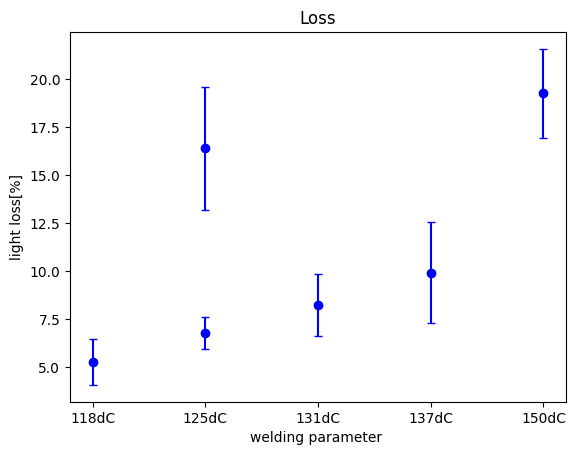

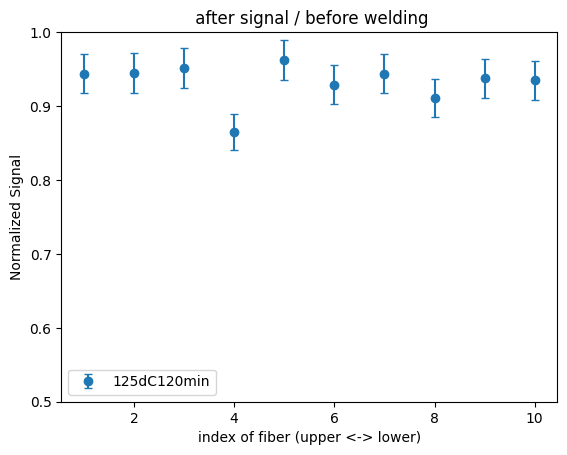

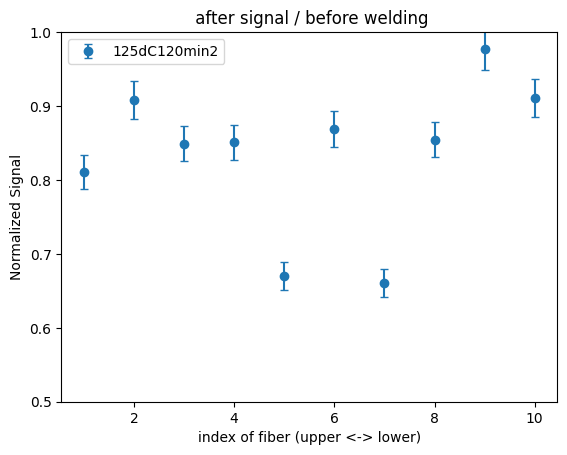

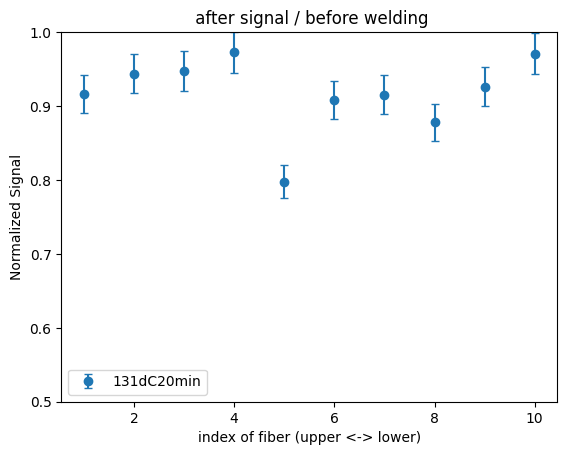

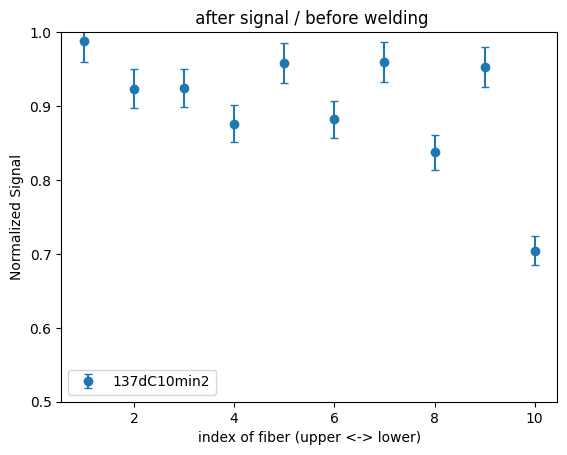

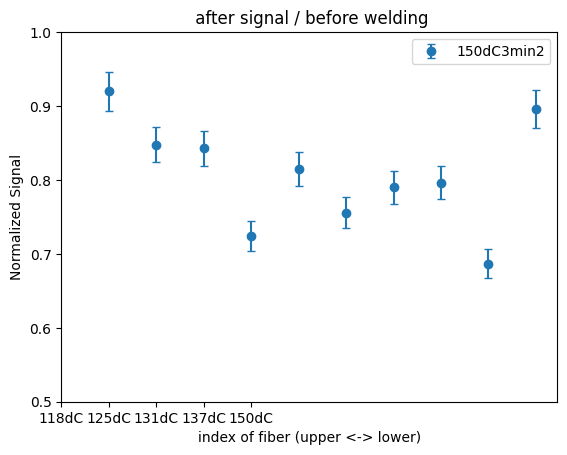

In [1]:
#************* *************

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plotDatasets = [# condition, before, after]
	['125dC120min','2023-12-06-121748','2023-12-06-200841']
	,['125dC120min2','2023-12-08-225841','2023-12-12-125943']
	,['131dC20min','2023-11-15-194738','2023-11-19-110826_2023-11-15-224348']
	#,['137dC10min','2023-11-12-182201','2023-11-15-194738']
	,['137dC10min2','2023-12-17-154334','2023-12-17-174653']
	#,['150dC3min','2023-11-11-211107','2023-11-12-134302']
	,['150dC3min2','2023-12-17-163006','2023-12-18-134743']
]
listDfRatios=[]
errRatio = 0.02 # from the connector coupling reproducibility
listDfs = []
fig_compare, ax_compare = plt.subplots()


#************************************************
for iParameter, listRuns in enumerate(plotDatasets):
	parameterLabel = listRuns[0]
	runDate = listRuns[1:]
	nMeasureSample = len(runDate) # [before ,after]
	
	# make and fill dfs to "listDfs" by each condition
	for irun,date in enumerate(runDate):
		df = pd.read_csv(f'./output_LoggerCSVs2FiberSignal/{parameterLabel}/output_logger2signal{date}.csv')
		df.index += 1
		listDfs.append(df) #both  before and after are filled.

	dfRatio = listDfs[nMeasureSample*iParameter+1]/listDfs[nMeasureSample*iParameter]
	mean_ratio = dfRatio.mean(numeric_only=True)
	listDfRatios.append(dfRatio)
	#********** make x and y ********
	x = np.arange(len(dfRatio))+1
	y = dfRatio.values.flatten()
	sampleSize = len(y)
	print("sample size = ",sampleSize)
	lossMean = (1-y.mean())*100
	lossErr = 100*y.std(ddof=1)/np.sqrt(sampleSize)
	print(f'{parameterLabel} loss [%]=',lossMean,"±",lossErr)
	yErr = y*np.sqrt(2)*errRatio
	
	#************* plot *************
	fig, ax = plt.subplots()
	ax.errorbar(x, y, yerr=yErr ,fmt='o'
						 , capsize=3, label=parameterLabel)
	ax.set_title(' after signal / before welding')
	ax.set_xlabel('index of fiber (upper <-> lower)')
	ax.set_ylabel('Normalized Signal')
	ax.set_ylim([0.5, 1])
	ax.legend()

plt.xticks(np.arange(5), ['118dC','125dC', '131dC', '137dC', '150dC'])

ax_compare.errorbar('118dC',5.27,yerr=1.2,	capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.errorbar('125dC',6.78,yerr=0.85,	capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.errorbar('125dC',16.39,yerr=3.2,	capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.errorbar('131dC',8.24,yerr=1.62,	capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.errorbar('137dC',9.92,yerr=2.62,	capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.errorbar('150dC',19.26,yerr=2.31,capsize=3,fmt='o',color='blue',ecolor='blue')
ax_compare.set_title('Loss')
ax_compare.set_xlabel('welding parameter ')
ax_compare.set_ylabel('light loss[%]')
plt.show()



# 125℃120minのばらつきから再現性をチェック

    fiber signals [V]
1            0.943765
2            0.944592
3            0.951681
4            0.864920
5            0.961761
6            0.928619
7            0.944009
8            0.910423
9            0.937582
10           0.934566
    fiber signals [V]
1            0.811250
2            0.907980
3            0.848996
4            0.850930
5            0.669717
6            0.868873
7            0.660620
8            0.854683
9            0.976880
10           0.911066


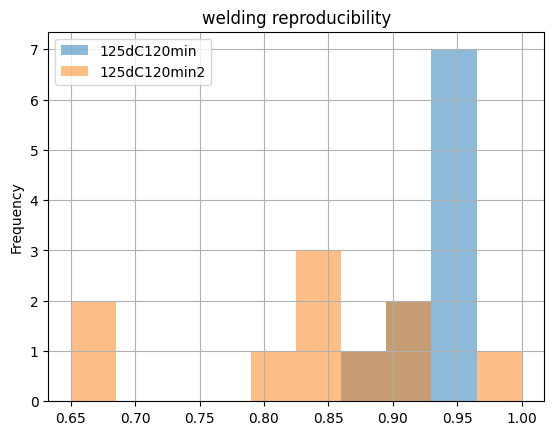

Rerr_125dC120min =  [0.94376541 0.94459246 0.95168111 0.86492045 0.96176149 0.92861937
 0.94400914 0.91042297 0.93758237 0.93456616 0.81125039 0.90797995
 0.84899605 0.85093033 0.66971677 0.86887287 0.66061966 0.85468276
 0.97688047 0.91106575]
mean loss [%] =  11.585420362834519 \pm 1.9493782633588301
std =  0.08717884621461663
std/mean [%] =  9.860234202591922


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plotDatasets = [
    ['125dC120min', '2023-12-06-121748', '2023-12-06-200841'],
    ['125dC120min2', '2023-12-08-225841', '2023-12-12-125943']
]
listDfRatios = []
errRatio = 0.02  # from the connector coupling reproducibility
listDfs = []
Rerr_125dC120min = np.empty(0)

fig, ax = plt.subplots()  # Fix typo: `plt.subplot()` -> `plt.subplots()`

# ************************************************
for iParameter, listRuns in enumerate(plotDatasets):
    parameterLabel = listRuns[0]
    runDate = listRuns[1:]
    nMeasureSample = len(runDate)  # [before ,after]

    # make and fill dfs to "listDfs" by each condition
    for irun, date in enumerate(runDate):
        df = pd.read_csv(f'./output_LoggerCSVs2FiberSignal/{parameterLabel}/output_logger2signal{date}.csv')
        df.index += 1
        listDfs.append(df)  # both  before and after are filled.

    dfRatio = listDfs[nMeasureSample * iParameter + 1] / listDfs[nMeasureSample * iParameter]
    y = dfRatio.values.flatten()
    Rerr_125dC120min = np.append(Rerr_125dC120min, y)

    # ************* draw hist *************
    dfRatio.plot(
        title='welding reproducibility',
        grid=True,
        legend=True,
        alpha=0.5,
        kind='hist',
        bins=10,
        range=(0.65,1.0),
        ax=ax  # Specify the axis for overlaying histograms
    )
    print(dfRatio)

ax.legend([f'{plotDatasets[0][0]}', f'{plotDatasets[1][0]}'])
plt.show()  # Show the plot outside the loop

print("Rerr_125dC120min = ", Rerr_125dC120min)
print("mean loss [%] = ", (1 - Rerr_125dC120min.mean()) * 100, "\pm",
      100 * Rerr_125dC120min.std(ddof=1) / np.sqrt(len(Rerr_125dC120min)))
print("std = ", Rerr_125dC120min.std(ddof=1))
print("std/mean [%] = ", Rerr_125dC120min.std(ddof=1) / Rerr_125dC120min.mean() * 100)
